## AutoML
Automated Machine Learning (AutoML): automating the discovery of the best machine learning algorithms and hyperparameters in order to solve predictive modeling tasks with very little to no user involvement.

When we apply this to neural networks, AutoML searches for the best model architecture used to train the model.

AutoKeras is a Python library used to perform AutoML for deep learning models.

https://autokeras.com/

In [ ]:
#!pip install git+https://github.com/keras-team/keras-tuner.git@1.0.2rc2
#!pip install autokeras

In [1]:
# debugging and formatter
from IPython.core.debugger import set_trace

%load_ext nb_black

import matplotlib.pyplot as plt
import numpy as np

<IPython.core.display.Javascript object>

### Regression 



In [2]:
from sklearn.datasets import make_regression

X, y = make_regression(
    n_samples=100000,
    n_features=5,
    n_informative=5,
    noise=10,
    random_state=7,
)

<IPython.core.display.Javascript object>

We'll modify the targets: 
- transform all targets such that all entries are non-negative 
- apply an exponential function to obtain non-linear targets which cannot be fitted using a simple linear model.

We'll use a logarithmic and an exponential function to transform the targets before training a linear regression model and using it for prediction.

In [3]:
y

array([  56.97340183, -192.50506119, -371.97055182, ...,   -4.74583029,
       -113.53999043,  -81.00751886])

<IPython.core.display.Javascript object>

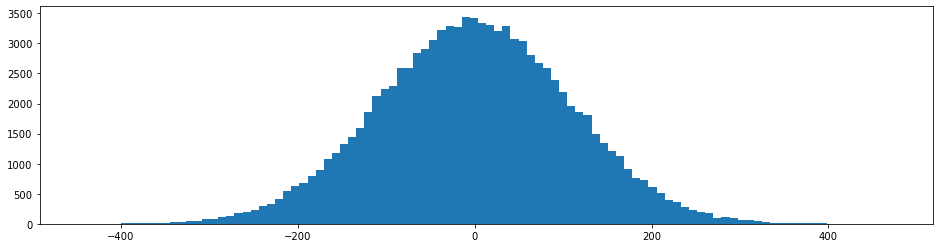

<IPython.core.display.Javascript object>

In [4]:
plt.figure(1, figsize=(16, 4))
_ = plt.hist(y, bins=100)

In [5]:
y = np.exp((y + abs(y.min())) / 200)
y_trans = np.log1p(y)

<IPython.core.display.Javascript object>

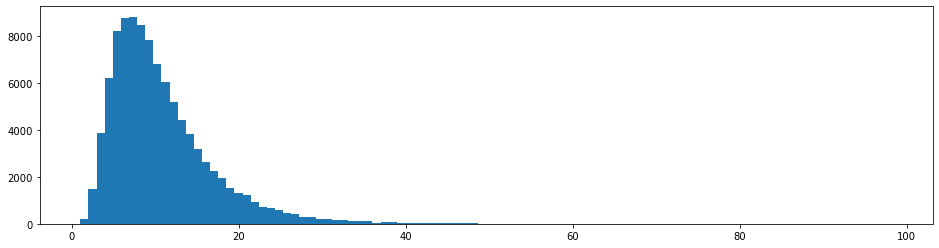

<IPython.core.display.Javascript object>

In [6]:
plt.figure(1, figsize=(16, 4))
_ = plt.hist(y, bins=100)

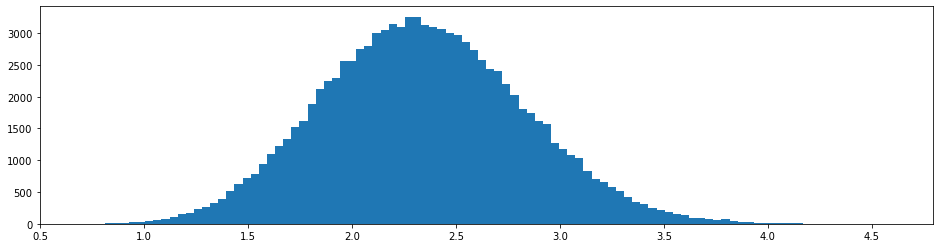

<IPython.core.display.Javascript object>

In [7]:
plt.figure(1, figsize=(16, 4))
_ = plt.hist(y_trans, bins=100)

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y_trans, test_size=0.3, random_state=7
)

<IPython.core.display.Javascript object>

AutoKeras can be applied to a regression task using StructuredDataRegressor.

In [9]:
from autokeras import StructuredDataRegressor

ak = StructuredDataRegressor(max_trials=3, loss="mean_absolute_error")

INFO:tensorflow:Reloading Oracle from existing project ./structured_data_regressor/oracle.json
INFO:tensorflow:Reloading Tuner from ./structured_data_regressor/tuner0.json


<IPython.core.display.Javascript object>

In [10]:
%%time
ak.fit(x=X_train, y=y_train, epochs=50, verbose=0)

INFO:tensorflow:Oracle triggered exit
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: ./structured_data_regressor/best_model/assets
CPU times: user 2min 34s, sys: 1min 15s, total: 3min 50s
Wall time: 1min 37s


<IPython.core.display.Javascript object>

In [11]:
mae, _ = ak.evaluate(X_test, y_test, verbose=0)
print(f"MAE: {mae}")

MAE: 0.0364731065928936


<IPython.core.display.Javascript object>

In [12]:
model = ak.export_model()

<IPython.core.display.Javascript object>

In [13]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 5)]               0         
_________________________________________________________________
multi_category_encoding (Mul (None, 5)                 0         
_________________________________________________________________
normalization (Normalization (None, 5)                 11        
_________________________________________________________________
dense (Dense)                (None, 32)                192       
_________________________________________________________________
re_lu (ReLU)                 (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
re_lu_1 (ReLU)               (None, 32)               

<IPython.core.display.Javascript object>

In [14]:
!ls

automl_autokeras.ipynb    structured_data_regressor


<IPython.core.display.Javascript object>

For classification tasks we can use the StructuredDataClassifier class.